<a href="https://colab.research.google.com/github/hitanshu5/Crop-Yield-Prediction-System/blob/main/Crop_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler

## Main 30 years data for crop yield (Dsitrict-wise)

In [ ]:
main_data_30_yrs = pd.read_csv('/content/India Agriculture Crop Production.csv')
main_data_30_yrs.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


### Selecting only Maharashtra

In [ ]:
maharashtra_main_data = main_data_30_yrs[main_data_30_yrs['State'] == 'Maharashtra']
maharashtra_main_data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
22370,Maharashtra,AHMEDNAGAR,Arhar/Tur,2001-02,Kharif,16700.0,Hectare,5400.0,Tonnes,0.323353
22371,Maharashtra,AHMEDNAGAR,Arhar/Tur,2002-03,Kharif,14600.0,Hectare,5700.0,Tonnes,0.390411
22372,Maharashtra,AHMEDNAGAR,Arhar/Tur,2003-04,Kharif,9000.0,Hectare,3000.0,Tonnes,0.333333
22373,Maharashtra,AKOLA,Arhar/Tur,2001-02,Kharif,46800.0,Hectare,41600.0,Tonnes,0.888889
22374,Maharashtra,AKOLA,Arhar/Tur,2002-03,Kharif,46500.0,Hectare,42100.0,Tonnes,0.905376


### Dropping the irrelevant attributes

In [ ]:
maharashtra_main_data = maharashtra_main_data.drop(['State', 'Area Units','Production', 'Production Units'], axis=1)
maharashtra_main_data.head()

,District,Crop,Year,Season,Area,Yield
22370,AHMEDNAGAR,Arhar/Tur,2001-02,Kharif,16700.0,0.323353
22371,AHMEDNAGAR,Arhar/Tur,2002-03,Kharif,14600.0,0.390411
22372,AHMEDNAGAR,Arhar/Tur,2003-04,Kharif,9000.0,0.333333
22373,AKOLA,Arhar/Tur,2001-02,Kharif,46800.0,0.888889
22374,AKOLA,Arhar/Tur,2002-03,Kharif,46500.0,0.905376


### Resetting the index

In [ ]:
maharashtra_main_data = maharashtra_main_data.reset_index(drop=True)
maharashtra_main_data.head()

,District,Crop,Year,Season,Area,Yield
0,AHMEDNAGAR,Arhar/Tur,2001-02,Kharif,16700.0,0.323353
1,AHMEDNAGAR,Arhar/Tur,2002-03,Kharif,14600.0,0.390411
2,AHMEDNAGAR,Arhar/Tur,2003-04,Kharif,9000.0,0.333333
3,AKOLA,Arhar/Tur,2001-02,Kharif,46800.0,0.888889
4,AKOLA,Arhar/Tur,2002-03,Kharif,46500.0,0.905376


In [ ]:
maharashtra_main_data.shape

(17922, 6)

In [ ]:
maharashtra_main_data["Season"] = maharashtra_main_data["Season"].apply(lambda x: x.strip())
maharashtra_main_data["Year"] = maharashtra_main_data["Year"].apply(lambda x: x.split('-')[0].strip())
maharashtra_main_data

,District,Crop,Year,Season,Area,Yield
0,AHMEDNAGAR,Arhar/Tur,2001,Kharif,16700.0,0.323353
1,AHMEDNAGAR,Arhar/Tur,2002,Kharif,14600.0,0.390411
2,AHMEDNAGAR,Arhar/Tur,2003,Kharif,9000.0,0.333333
3,AKOLA,Arhar/Tur,2001,Kharif,46800.0,0.888889
4,AKOLA,Arhar/Tur,2002,Kharif,46500.0,0.905376
...,...,...,...,...,...,...
17917,WASHIM,Wheat,2000,Rabi,12800.0,0.968750
17918,YAVATMAL,Wheat,1997,Rabi,18600.0,0.467742
17919,YAVATMAL,Wheat,1998,Rabi,21100.0,1.208531
17920,YAVATMAL,Wheat,1999,Rabi,24200.0,1.190083


In [ ]:
maharashtra_main_data['District'].value_counts()

,count
District,
AHMEDNAGAR,697
PUNE,689
SATARA,667
SOLAPUR,662
LATUR,660
PARBHANI,656
BEED,652
OSMANABAD,652
NANDED,652


### Dropping districts with very little data rows

In [ ]:
maharashtra_main_data = maharashtra_main_data[maharashtra_main_data['District'] != 'MUMBAI']
maharashtra_main_data = maharashtra_main_data[maharashtra_main_data['District'] != 'MUMBAI SUBURBAN']
maharashtra_main_data['District'].value_counts()

,count
District,
AHMEDNAGAR,697
PUNE,689
SATARA,667
SOLAPUR,662
LATUR,660
PARBHANI,656
OSMANABAD,652
NANDED,652
BEED,652


In [ ]:
maharashtra_main_data['Crop'].value_counts()

,count
Crop,
Maize,1572
Groundnut,1232
Sunflower,1222
Jowar,1189
Sesamum,931
Rice,874
Small millets,784
Urad,742
Moong(Green Gram),737


## Selecting the crops that are widely grown currently, and those that have good potential

In [ ]:
crops_to_drop = ['Tobacco', 'Onion', 'Banana', 'Other Summer Pulses', 'other oilseeds', 'Ragi', 'Other Cereals', 'Linseed', 'Castor seed', 'Safflower', 'Niger seed', 'Bajra', 'Other Rabi pulses', 'Other Kharif pulses', 'Wheat']
maharashtra_main_data.drop(maharashtra_main_data[maharashtra_main_data['Crop'].isin(crops_to_drop)].index, inplace = True)
maharashtra_main_data['Crop'].value_counts()

,count
Crop,
Maize,1572
Groundnut,1232
Sunflower,1222
Jowar,1189
Sesamum,931
Rice,874
Small millets,784
Urad,742
Moong(Green Gram),737


In [ ]:
maharashtra_main_data.head()

,District,Crop,Year,Season,Area,Yield
0,AHMEDNAGAR,Arhar/Tur,2001,Kharif,16700.0,0.323353
1,AHMEDNAGAR,Arhar/Tur,2002,Kharif,14600.0,0.390411
2,AHMEDNAGAR,Arhar/Tur,2003,Kharif,9000.0,0.333333
3,AKOLA,Arhar/Tur,2001,Kharif,46800.0,0.888889
4,AKOLA,Arhar/Tur,2002,Kharif,46500.0,0.905376


In [ ]:
def clean_crop_name(crop):
    if crop == 'Small millets':
        return 'Small Millets'
    elif crop == 'Moong(Green Gram)':
        return 'Moong'
    elif crop == 'Arhar/Tur':
        return 'Tur'
    elif crop == 'Cotton(lint)':
        return 'Cotton'
    elif crop == 'Rapeseed &Mustard':
        return 'Mustard'
    else:
        return crop

In [ ]:
maharashtra_main_data['Crop'] = maharashtra_main_data['Crop'].apply(clean_crop_name)

In [ ]:
maharashtra_main_data

,District,Crop,Year,Season,Area,Yield
0,AHMEDNAGAR,Tur,2001,Kharif,16700.0,0.323353
1,AHMEDNAGAR,Tur,2002,Kharif,14600.0,0.390411
2,AHMEDNAGAR,Tur,2003,Kharif,9000.0,0.333333
3,AKOLA,Tur,2001,Kharif,46800.0,0.888889
4,AKOLA,Tur,2002,Kharif,46500.0,0.905376
...,...,...,...,...,...,...
17807,WASHIM,Urad,2000,Kharif,61000.0,0.439344
17808,YAVATMAL,Urad,1997,Kharif,23300.0,0.240343
17809,YAVATMAL,Urad,1998,Kharif,24100.0,0.539419
17810,YAVATMAL,Urad,1999,Kharif,23800.0,0.756303


In [ ]:
maharashtra_main_data.isna().sum()

,0
District,0
Crop,0
Year,0
Season,0
Area,0
Yield,0


## District-wise weather data

In [ ]:
weather_data = pd.read_csv('/content/weather_data.csv')
weather_data.head()

,District,year,season,temperature_2m_mean,rain_sum
0,AHMEDNAGAR,1997,Autumn,22.646185,49.500
1,AHMEDNAGAR,1997,Kharif,23.998425,112.450
2,AHMEDNAGAR,1997,Rabi,21.448471,9.375
3,AHMEDNAGAR,1997,Summer,27.624930,8.750
4,AHMEDNAGAR,1998,Autumn,21.595100,66.500


In [ ]:
weather_data.columns = ['District', 'Year', 'Season', 'Temperature', 'Rainfall']
weather_data["Year"] = weather_data["Year"].apply(lambda x: f"{x}")
weather_data["District"] = weather_data["District"].apply(lambda x: x.strip().upper())
weather_data.sort_values(by = ["District", "Year", "Season"], inplace = True)
weather_data

,District,Year,Season,Temperature,Rainfall
0,AHMEDNAGAR,1997,Autumn,22.646185,49.500000
1,AHMEDNAGAR,1997,Kharif,23.998425,112.450000
2,AHMEDNAGAR,1997,Rabi,21.448471,9.375000
3,AHMEDNAGAR,1997,Summer,27.624930,8.750000
4,AHMEDNAGAR,1998,Autumn,21.595100,66.500000
...,...,...,...,...,...
2847,YAVATMAL,2018,Summer,34.262380,10.600000
2848,YAVATMAL,2019,Autumn,24.885715,42.749996
2849,YAVATMAL,2019,Kharif,28.049831,284.575000
2850,YAVATMAL,2019,Rabi,24.421940,5.400001


### Merging the 2 datasets

In [ ]:
merged_df = pd.merge(maharashtra_main_data, weather_data, how = 'left', on = ['District', 'Year', 'Season'])
merged_df

,District,Crop,Year,Season,Area,Yield,Temperature,Rainfall
0,AHMEDNAGAR,Tur,2001,Kharif,16700.0,0.323353,23.508500,151.87500
1,AHMEDNAGAR,Tur,2002,Kharif,14600.0,0.390411,23.652390,124.05000
2,AHMEDNAGAR,Tur,2003,Kharif,9000.0,0.333333,23.707798,127.42500
3,AKOLA,Tur,2001,Kharif,46800.0,0.888889,27.150816,178.65000
4,AKOLA,Tur,2002,Kharif,46500.0,0.905376,27.332598,280.80002
...,...,...,...,...,...,...,...,...
13006,WASHIM,Urad,2000,Kharif,61000.0,0.439344,25.681866,243.42500
13007,YAVATMAL,Urad,1997,Kharif,23300.0,0.240343,27.584457,213.05000
13008,YAVATMAL,Urad,1998,Kharif,24100.0,0.539419,27.739752,232.02500
13009,YAVATMAL,Urad,1999,Kharif,23800.0,0.756303,26.204884,225.75000


In [ ]:
merged_df.isna().sum()

,0
District,0
Crop,0
Year,0
Season,0
Area,0
Yield,0
Temperature,870
Rainfall,870


In [ ]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isna().sum()

,0
District,0
Crop,0
Year,0
Season,0
Area,0
Yield,0
Temperature,0
Rainfall,0


In [ ]:
merged_df.shape

(12141, 8)

In [ ]:
cols = list(merged_df.columns)
cols.insert(len(cols)-1, cols.pop(cols.index('Yield')))
merged_df = merged_df.loc[:, cols]
merged_df.head()

,District,Crop,Year,Season,Area,Temperature,Rainfall,Yield
0,AHMEDNAGAR,Tur,2001,Kharif,16700.0,23.508500,151.87500,0.323353
1,AHMEDNAGAR,Tur,2002,Kharif,14600.0,23.652390,124.05000,0.390411
2,AHMEDNAGAR,Tur,2003,Kharif,9000.0,23.707798,127.42500,0.333333
3,AKOLA,Tur,2001,Kharif,46800.0,27.150816,178.65000,0.888889
4,AKOLA,Tur,2002,Kharif,46500.0,27.332598,280.80002,0.905376


In [ ]:
merged_df['Year'] = merged_df['Year'].astype(int)

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
merged_df = pd.read_csv('cleaned_final_merged_df.csv')

In [ ]:
merged_df['Year'] = pd.to_datetime(merged_df['Year']).dt.year

In [ ]:
merged_df

,District,Crop,Year,Season,Area,Temperature,Rainfall,Yield
0,AHMEDNAGAR,Gram,1997,Kharif,40800.000000,23.998425,112.450000,0.455882
1,AHMEDNAGAR,Jowar,1997,Kharif,900.000000,23.998425,112.450000,1.222222
2,AHMEDNAGAR,Jowar,1997,Rabi,598400.000000,21.448471,9.375000,0.362634
3,AHMEDNAGAR,Maize,1997,Autumn,1.000000,22.646185,49.500000,1113.000000
4,AHMEDNAGAR,Maize,1997,Kharif,4400.000000,23.998425,112.450000,1.068182
...,...,...,...,...,...,...,...,...
15260,YAVATMAL,Sunflower,2023,Kharif,507.570557,27.467647,232.455777,0.088992
15261,YAVATMAL,Sunflower,2023,Rabi,464.295199,23.679771,7.722425,0.738797
15262,YAVATMAL,Sunflower,2023,Summer,138.358033,33.803199,44.190853,0.867303
15263,YAVATMAL,Tur,2023,Kharif,114789.322686,25.556223,268.167157,1.207754


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15265 entries, 0 to 15264
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     15265 non-null  object 
 1   Crop         15265 non-null  object 
 2   Year         15265 non-null  int32  
 3   Season       15265 non-null  object 
 4   Area         15265 non-null  float64
 5   Temperature  15265 non-null  float64
 6   Rainfall     15265 non-null  float64
 7   Yield        15265 non-null  float64
dtypes: float64(4), int32(1), object(3)
memory usage: 894.6+ KB


In [ ]:
merged_df.isna().sum()

,0
District,0
Crop,0
Year,0
Season,0
Area,0
Temperature,0
Rainfall,0
Yield,0


In [ ]:
merged_df.describe()

,Year,Area,Temperature,Rainfall,Yield
count,15265.000000,15265.000000,15265.000000,15265.000000,15265.000000
mean,2010.753554,30161.111298,26.202697,139.197656,1.676389
std,7.923759,68682.196187,2.805700,139.197042,24.331673
min,1997.000000,-342294.812826,20.075712,-25.259322,-141.618385
25%,2004.000000,500.000000,24.140198,6.150000,0.432900
50%,2011.000000,4000.000000,25.867495,140.225000,0.731421
75%,2018.000000,30161.111298,27.282784,214.875000,1.272727
max,2023.000000,806345.275297,36.179375,939.078821,1494.000000


In [ ]:
merged_df.shape

(15265, 8)

In [ ]:
initial_rows = merged_df.shape[0]
merged_df = merged_df[(merged_df["Area"] >= 0) & (merged_df["Rainfall"] >= 0) & (merged_df["Yield"] >= 0)]
print(f"Removed {initial_rows - merged_df.shape[0]} rows with negative values.")

Removed 501 rows with negative values.


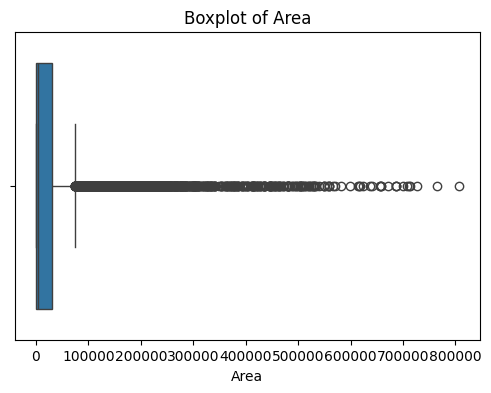

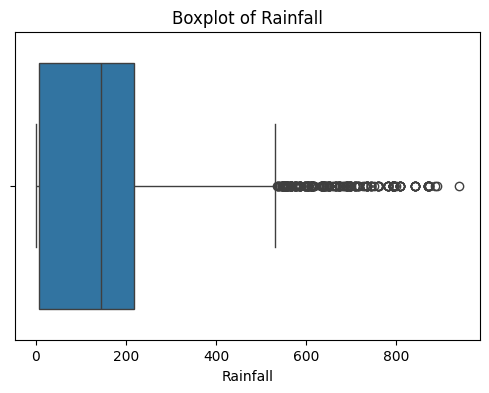

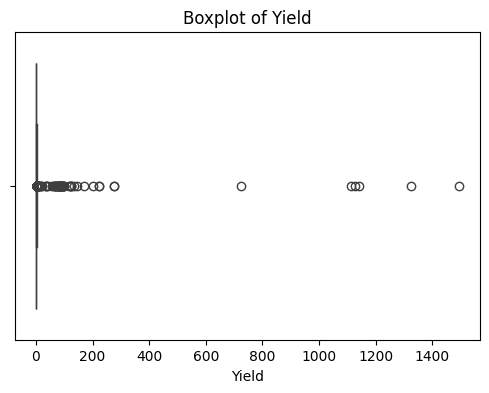

In [ ]:
for column in ["Area", "Rainfall", "Yield"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=merged_df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

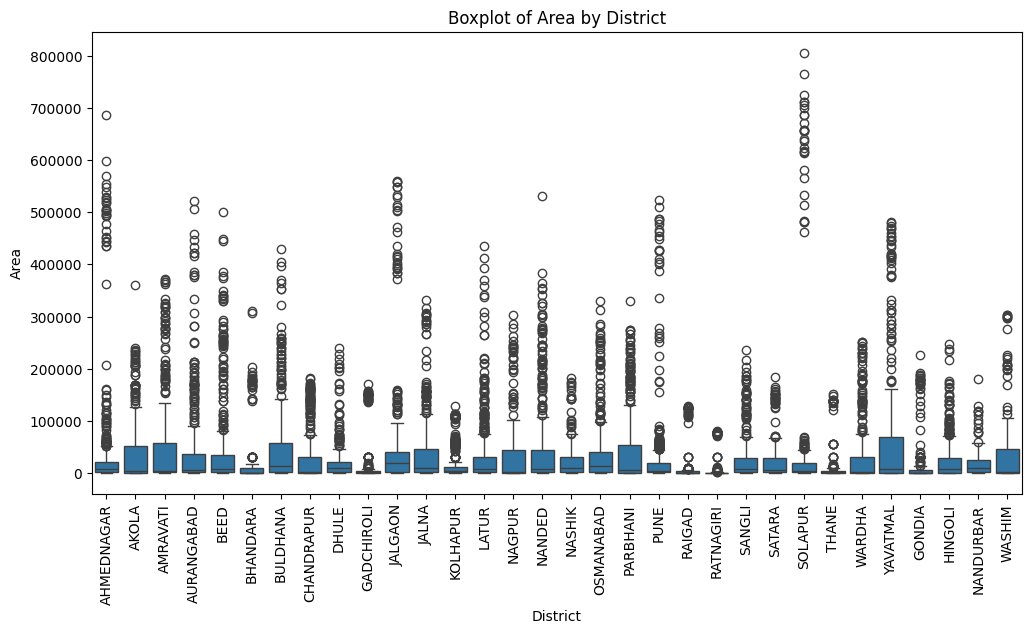

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(x="District", y="Area", data=merged_df)
plt.xticks(rotation=90)
plt.title("Boxplot of Area by District")
plt.show()

In [ ]:
def remove_outliers_by_district(merged_df, column, groupby_col):

    for district in merged_df[groupby_col].unique():
        Q1 = merged_df[merged_df[groupby_col] == district][column].quantile(0.25)
        Q3 = merged_df[merged_df[groupby_col] == district][column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove only the extreme outliers per district
        merged_df = merged_df.drop(merged_df[(merged_df[groupby_col] == district) &
                                                ((merged_df[column] < lower_bound) |
                                                 (merged_df[column] > upper_bound))].index)
    return merged_df

df1 = remove_outliers_by_district(merged_df, "Area", "District")

In [ ]:
merged_df.shape

(14764, 8)

In [ ]:
Q1 = merged_df["Yield"].quantile(0.25)
Q3 = merged_df["Yield"].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df["Yield"] >= Q1 - 1.5 * IQR) & (merged_df["Yield"] <= Q3 + 1.5 * IQR)]
print("After outlier removal, dataset shape:", merged_df.shape)

After outlier removal, dataset shape: (14151, 8)


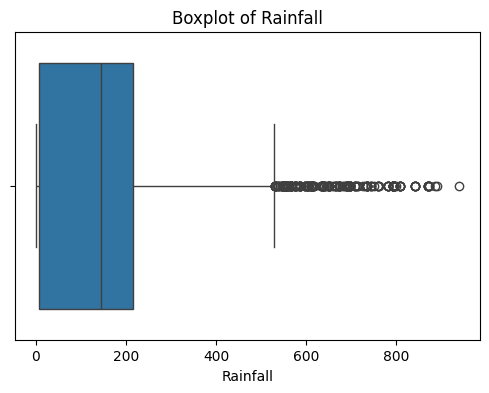

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=merged_df['Rainfall'])
plt.title(f"Boxplot of Rainfall")
plt.show()

In [ ]:
Q1 = merged_df["Rainfall"].quantile(0.25)
Q3 = merged_df["Rainfall"].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[(merged_df["Rainfall"] >= Q1 - 1.5 * IQR) & (merged_df["Rainfall"] <= Q3 + 1.5 * IQR)]
print("After outlier removal, dataset shape:", merged_df.shape)

After outlier removal, dataset shape: (13904, 8)


In [ ]:
merged_df.describe()

,Year,Area,Temperature,Rainfall,Yield
count,13904.000000,13904.000000,13904.000000,13904.000000,13904.000000
mean,2010.318326,31272.599367,26.251194,132.471265,0.856755
std,7.832689,70041.438869,2.806518,119.135086,0.571916
min,1997.000000,0.933983,21.194515,0.000000,0.000000
25%,2003.000000,600.000000,24.183239,6.650000,0.422564
50%,2010.000000,4500.000000,25.954102,141.475000,0.703608
75%,2017.000000,30161.111298,27.319715,212.450000,1.181301
max,2023.000000,806345.275297,36.179375,528.250000,2.545455


In [ ]:
merged_df.shape

(13904, 8)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13904 entries, 0 to 15264
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     13904 non-null  object 
 1   Crop         13904 non-null  object 
 2   Year         13904 non-null  int32  
 3   Season       13904 non-null  object 
 4   Area         13904 non-null  float64
 5   Temperature  13904 non-null  float64
 6   Rainfall     13904 non-null  float64
 7   Yield        13904 non-null  float64
dtypes: float64(4), int32(1), object(3)
memory usage: 923.3+ KB


In [ ]:
merged_df['Year'] = merged_df['Year'].astype('int64')

<ipython-input-203-c8f4a042d357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Year'] = merged_df['Year'].astype('int64')


## Label encoding

In [ ]:
District = list(set(merged_df["District"]))
District.sort()

Crop = list(set(merged_df["Crop"]))
Crop.sort()

Season = list(set(merged_df["Season"]))
Season.sort()

In [ ]:
len(District)

32

In [ ]:
len(Crop)

15

In [ ]:
len(Season)

4

In [ ]:
local_path = "./Encodings.txt"

try:
    with open(local_path, 'w') as f:
        for i, v in enumerate(District):
            f.write(f"{i+1} {v}\n")
        f.write("\n")
        for i, v in enumerate(Crop):
            f.write(f"{i+1} {v}\n")
        f.write("\n")
        for i, v in enumerate(Season):
            f.write(f"{i+1} {v}\n")
        f.write("\n")
    print(f"Encodings saved successfully at {local_path}")
except Exception as e:
    print("Error:", e)


Encodings saved successfully at ./Encodings.txt


In [ ]:
merged_df["District"] = merged_df["District"].apply(lambda x: District.index(x) + 1)
merged_df["Crop"] = merged_df["Crop"].apply(lambda x: Crop.index(x) + 1)
merged_df["Season"] = merged_df["Season"].apply(lambda x: Season.index(x) + 1)

merged_df

,District,Crop,Year,Season,Area,Temperature,Rainfall,Yield
0,1,2,1997,2,40800.000000,23.998425,112.450000,0.455882
1,1,4,1997,2,900.000000,23.998425,112.450000,1.222222
2,1,4,1997,3,598400.000000,21.448471,9.375000,0.362634
4,1,5,1997,2,4400.000000,23.998425,112.450000,1.068182
5,1,5,1997,3,6200.000000,21.448471,9.375000,1.467742
...,...,...,...,...,...,...,...,...
15260,32,13,2023,2,507.570557,27.467647,232.455777,0.088992
15261,32,13,2023,3,464.295199,23.679771,7.722425,0.738797
15262,32,13,2023,4,138.358033,33.803199,44.190853,0.867303
15263,32,14,2023,2,114789.322686,25.556223,268.167157,1.207754


In [ ]:
merged_df[(merged_df["District"] == 1) & (merged_df["Crop"] == 2)]

,District,Crop,Year,Season,Area,Temperature,Rainfall,Yield
0,1,2,1997,2,40800.000000,23.998425,112.450000,0.455882
265,1,2,1998,3,59600.000000,21.875889,0.075000,0.686242
780,1,2,1999,3,55300.000000,22.058489,2.225000,0.625678
1344,1,2,2000,3,61000.000000,21.695917,6.325000,0.496721
1904,1,2,2001,3,60000.000000,22.592510,0.100000,0.551667
2481,1,2,2002,3,64500.000000,22.563309,1.475000,0.410853
3057,1,2,2003,3,50900.000000,23.271942,0.450000,0.402750
3615,1,2,2004,3,61700.000000,23.082682,0.125000,0.662885
4190,1,2,2005,3,68600.000000,22.101446,3.600000,0.686589
4762,1,2,2006,3,95800.000000,22.681137,1.250000,0.685804


In [ ]:
merged_df.to_csv('final_df.csv', index=False)